<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Stock_3_sandy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [66]:
df = pd.read_csv("/content/drive/MyDrive/GL_Project_Sandy/Banknifty_5m_data_1_oct.csv")

In [67]:
df.shape

(4499, 7)

In [68]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-07-06 09:15:00+05:30,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0
1,2022-07-06 09:20:00+05:30,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0
2,2022-07-06 09:25:00+05:30,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0
3,2022-07-06 09:30:00+05:30,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0
4,2022-07-06 09:35:00+05:30,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0


Removing Time string. Take date/month/year alone for analysis

In [69]:
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.date

In [70]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-07-06,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0
1,2022-07-06,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0
2,2022-07-06,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0
3,2022-07-06,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0
4,2022-07-06,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   4499 non-null   object 
 1   Open       4499 non-null   float64
 2   High       4499 non-null   float64
 3   Low        4499 non-null   float64
 4   Close      4499 non-null   float64
 5   Adj Close  4499 non-null   float64
 6   Volume     4499 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 246.2+ KB


In [72]:
df.isnull().sum()

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Converting the data type from "object" to "datetime" for the "Datetime"

In [73]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Datetime   4499 non-null   datetime64[ns]
 1   Open       4499 non-null   float64       
 2   High       4499 non-null   float64       
 3   Low        4499 non-null   float64       
 4   Close      4499 non-null   float64       
 5   Adj Close  4499 non-null   float64       
 6   Volume     4499 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 246.2 KB


In [75]:
print(f'DataFrame contains stock between {df.Datetime.min()} {df.Datetime.max()}')
print(f'Total numner of days = {(df.Datetime.max()- df.Datetime.min()).days} days')

DataFrame contains stock between 2022-07-06 00:00:00 2022-09-30 00:00:00
Total numner of days = 86 days


In [76]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.0
mean,38232.863543,38259.840769,38205.939855,38233.823223,38233.823223,0.0
std,1964.348261,1965.959555,1962.130293,1963.918792,1963.918792,0.0
min,33929.398438,34074.750000,33916.101562,33992.148438,33992.148438,0.0
25%,36712.449219,36728.974609,36674.500000,36711.701172,36711.701172,0.0
50%,38413.000000,38450.750000,38387.199219,38414.699219,38414.699219,0.0
75%,39513.699219,39542.724609,39492.875000,39516.650391,39516.650391,0.0
max,41795.851562,41830.351562,41766.300781,41788.199219,41788.199219,0.0


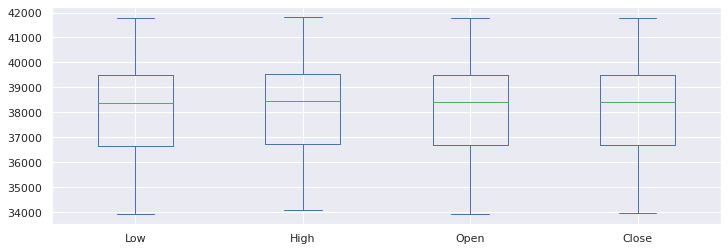

In [77]:
df[['Low','High','Open','Close']].plot(kind= 'box', figsize=(12,4))

In [78]:
df.set_index('Datetime', inplace = True)

In [79]:
df.drop(["Volume"], axis = 1, inplace = True)

In [80]:
df.head()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-07-06,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438
2022-07-06,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438
2022-07-06,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219
2022-07-06,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219
2022-07-06,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000


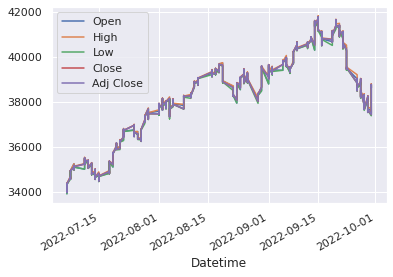

In [81]:
df.plot()

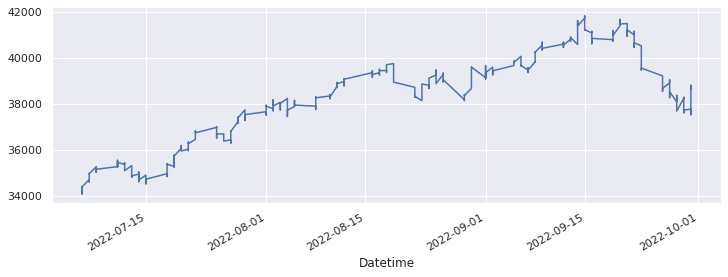

In [63]:
df['High'].plot(figsize=(12,4))

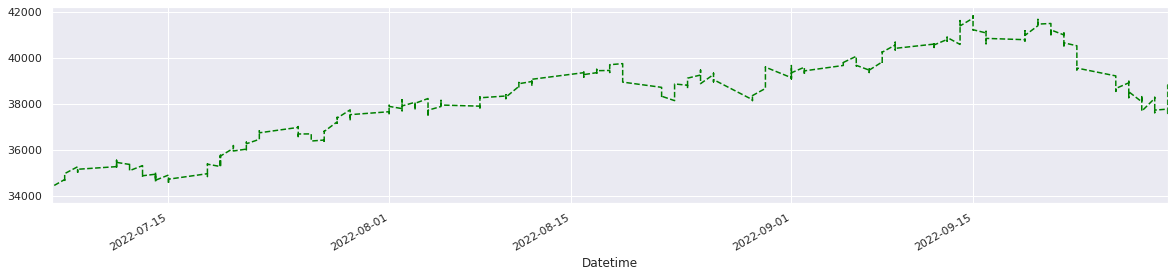

In [87]:
df['High'].plot(xlim=['2022-07-06', '2022-09-30'], figsize=(20,4),ls='--',c='green')

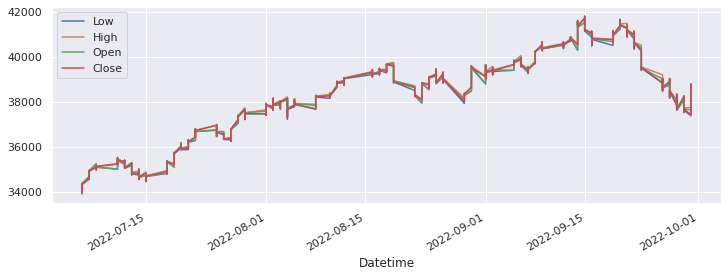

In [62]:
df[['Low','High','Open','Close']].plot(figsize=(12,4))

Checking the details of last day or end of the year. Since we have only one year of data, displyed only one record of last day of the year. Suppose If we have 5 years of data, will get the details of end of the year data seperately for 5 years. 

In [88]:
df.resample(rule='A').min()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-12-31,33929.398438,34074.75,33916.101562,33992.148438,33992.148438


In [89]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-12-31,41795.851562,41830.351562,41766.300781,41788.199219,41788.199219


Checked what is the minimum and maximum prize at the year end.

We can check how quartley the price is varying. Since we have only 3 months of data, only one record.

In [91]:
df.resample(rule='QS').min()['High']

Datetime
2022-07-01    34074.75
Freq: QS-JAN, Name: High, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 210.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


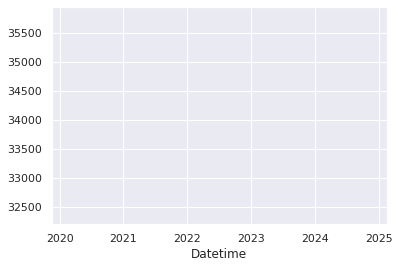

In [92]:
df.resample(rule='QS').min()['High'].plot()

In [93]:
df.resample(rule='QS').max()['High']

Datetime
2022-07-01    41830.351562
Freq: QS-JAN, Name: High, dtype: float64

Business End Frequency

In [99]:
df.resample(rule='BA').max()['High']

Datetime
2022-12-30    41830.351562
Freq: BA-DEC, Name: High, dtype: float64

Business End Frequency quartley

In [95]:
df.resample(rule='BQS').max()['High']

Datetime
2022-07-01    41830.351562
Freq: BQS-JAN, Name: High, dtype: float64

**Fetching Monthly Maximum details **

In [97]:
df['Open'].resample(rule='M').max()

Datetime
2022-07-31    37717.300781
2022-08-31    39732.648438
2022-09-30    41795.851562
Freq: M, Name: Open, dtype: float64

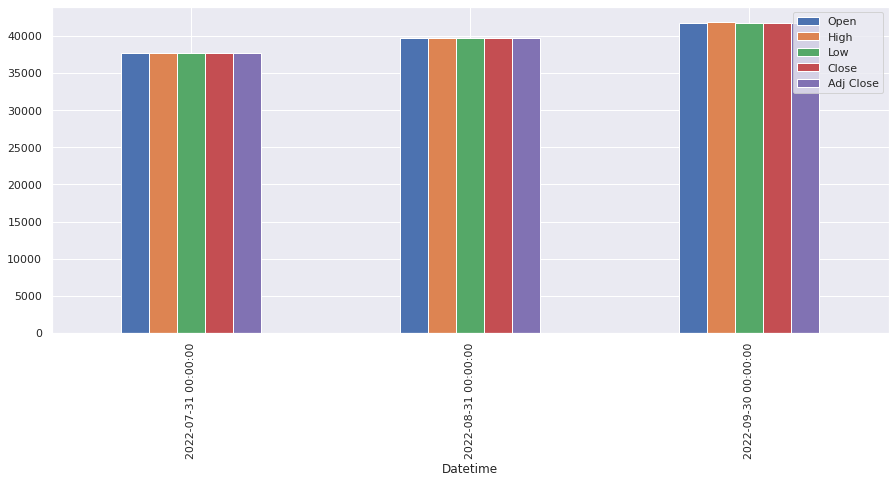

In [104]:
df.resample(rule='M').max().plot(kind='bar',figsize=(15,6))

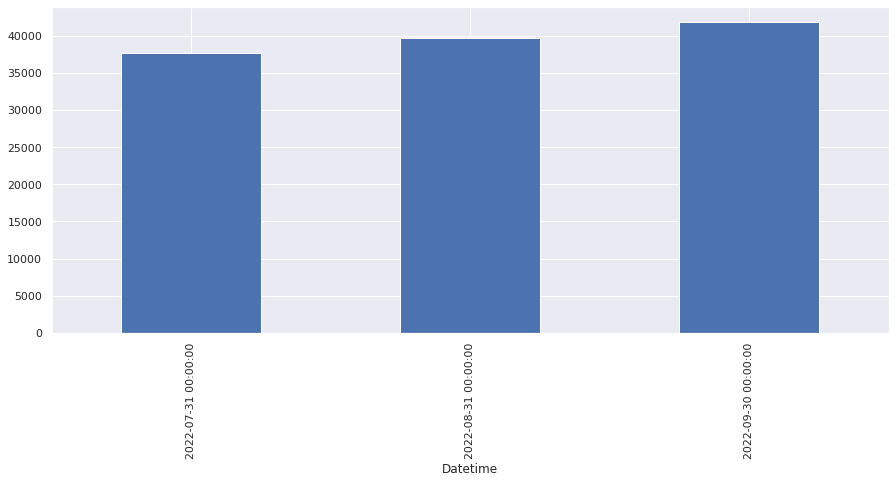

In [100]:
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

**Fetching Monthly Minimum details **

In [101]:
df['Open'].resample(rule='M').min()

Datetime
2022-07-31    33929.398438
2022-08-31    37349.550781
2022-09-30    37428.148438
Freq: M, Name: Open, dtype: float64

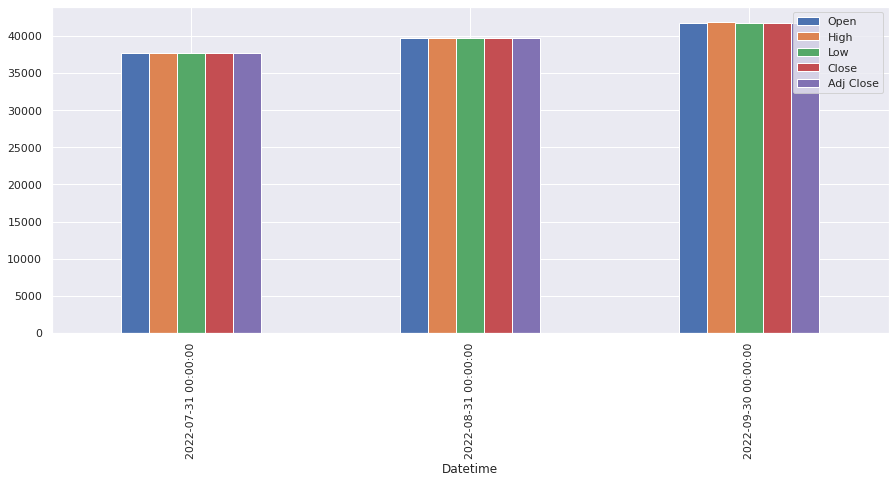

In [103]:
df.resample(rule='M').max().plot(kind='bar',figsize=(15,6))

**Simple Moving Average**

In [ ]:
df['Open:30 days rolling']=train_data['Open'].rolling(30).mean()

In [ ]:
df.head(32)

,Datetime,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
0,2022-07-06 09:15:00+05:30,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0,NaN
1,2022-07-06 09:20:00+05:30,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0,NaN
2,2022-07-06 09:25:00+05:30,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0,NaN
3,2022-07-06 09:30:00+05:30,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0,NaN
4,2022-07-06 09:35:00+05:30,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0,NaN
5,2022-07-06 09:40:00+05:30,34093.550781,34102.050781,33988.800781,33992.148438,33992.148438,0,NaN
6,2022-07-06 09:45:00+05:30,33997.500000,34107.148438,33962.851562,34107.148438,34107.148438,0,NaN
7,2022-07-06 09:50:00+05:30,34108.699219,34138.800781,34098.250000,34117.101562,34117.101562,0,NaN
8,2022-07-06 09:55:00+05:30,34118.300781,34122.648438,34051.000000,34060.300781,34060.300781,0,NaN
9,2022-07-06 10:00:00+05:30,34060.000000,34074.750000,34044.101562,34066.101562,34066.101562,0,NaN


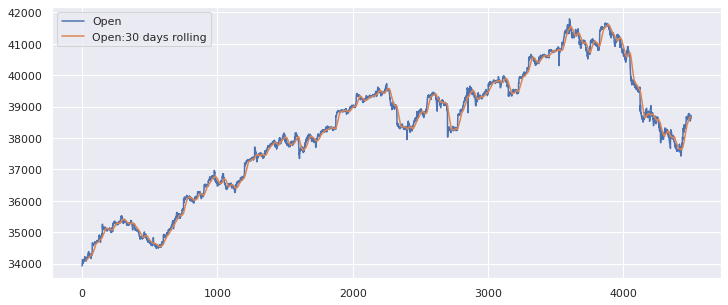

In [ ]:
df[['Open','Open:30 days rolling']].plot(figsize=(12,5))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 210.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


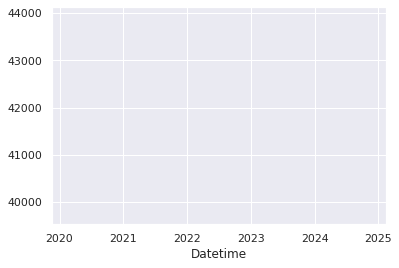

In [30]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df.resample(rule='QS').max()['High'].plot()

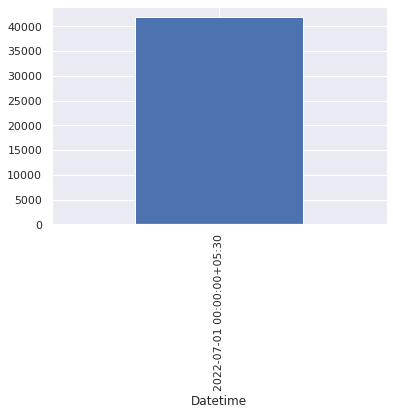

In [31]:
df.resample(rule='QS').max()['High'].plot(kind ='bar')

In [32]:
df.resample(rule='M').max()['High']

Datetime
2022-07-31 00:00:00+05:30    37737.898438
2022-08-31 00:00:00+05:30    39750.898438
2022-09-30 00:00:00+05:30    41830.351562
Freq: M, Name: High, dtype: float64

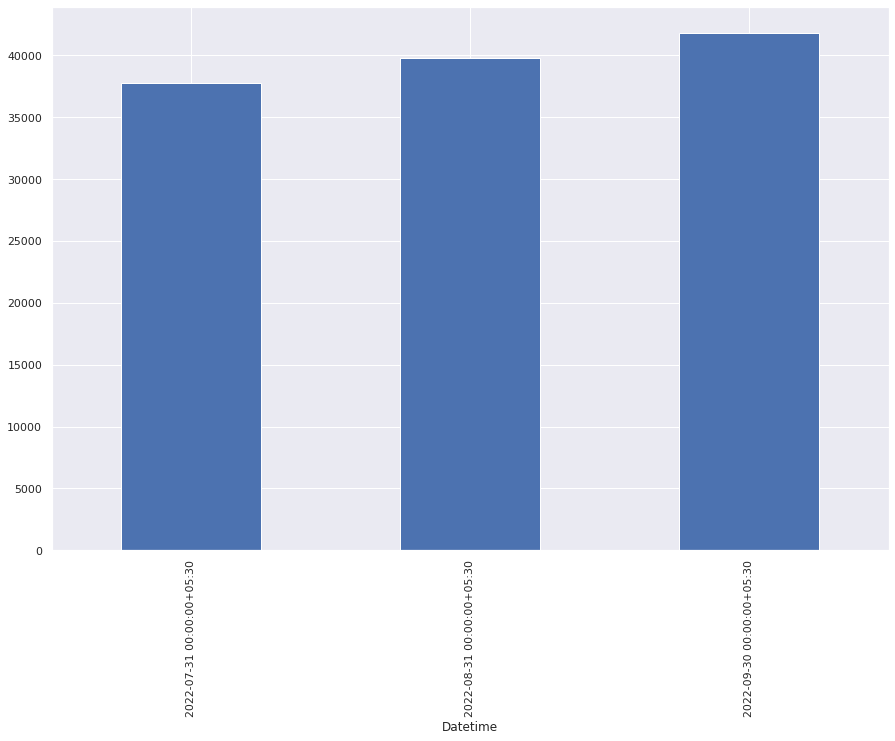

In [33]:
df.resample(rule='M').max()['High'].plot(kind='bar', figsize=(15,10))

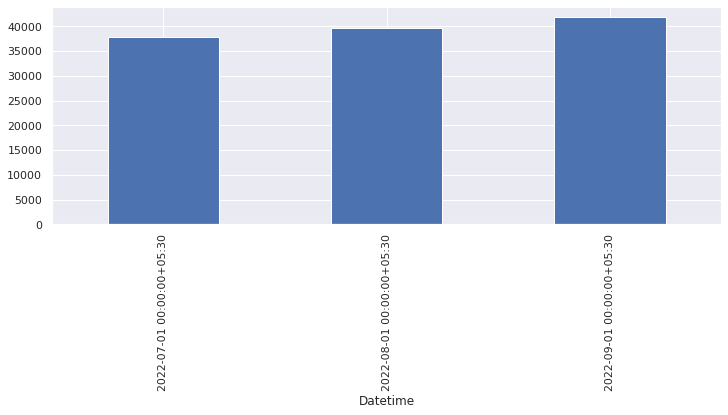

In [35]:
df.resample(rule='MS').max()['High'].plot(kind = 'bar', figsize=(12,4))

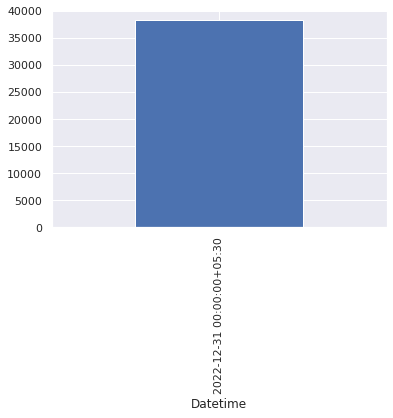

In [36]:
df['Open'].resample(rule='A').mean().plot(kind='bar')

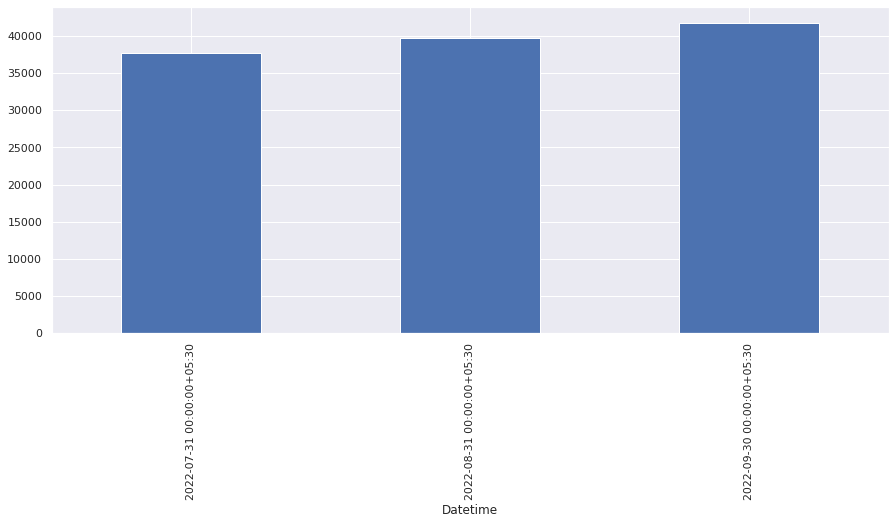

In [37]:
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))